Quantitative Analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as pe
import os
import sys
import nltk

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

# Debug: Print current working directory and Python path
print('Current working directory:', os.getcwd())
print('Python path:', sys.path)

# Load data
from src.data_loader import load_data
from src.data_analyzer import get_summary_statistics
from scripts.quantitative_analysis import (
    plot_technical_vs_close,
    plot_closing_prices,
    add_technical_indicators,
    plot_sentiment_distribution,
    compute_sentiment_score,
    plot_publisher_sentiment,
    check_missing_values,
    compute_descriptive_statistics
)



Current working directory: c:\Users\Daniel.Temesgen\Desktop\KIAM\Week1\notebooks
Python path: ['C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1', '', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\win32', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1',

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Historical Data AApl

In [39]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\AAPL_historical_data.csv'
df_aapl = load_data(file_path)
df_aapl.head()

2025-05-31 14:30:01,283 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\AAPL_historical_data.csv with 10998 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


Historical Data of AMZN Load

In [40]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\AMZN_historical_data.csv'
df_amzn = load_data(file_path)
df_amzn.head()

2025-05-31 14:30:05,723 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\AMZN_historical_data.csv with 6846 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


Historical Data of GOOG Load

In [41]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\GOOG_historical_data.csv'
df_goog = load_data(file_path)
df_goog.head()

2025-05-31 14:30:09,120 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\GOOG_historical_data.csv with 5020 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


Historical Data of META Load

In [42]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\META_historical_data.csv'
df_meta = load_data(file_path)
df_meta.head()

2025-05-31 14:30:11,845 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\META_historical_data.csv with 2926 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


Historical Data of MSFT Load

In [43]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\MSFT_historical_data.csv'
df_msft = load_data(file_path)
df_msft.head()

2025-05-31 14:30:15,030 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\MSFT_historical_data.csv with 9672 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


Historical Data of NVDA Load

In [44]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\NVDA_historical_data.csv'
df_nvda = load_data(file_path)
df_nvda.head()

2025-05-31 14:30:18,192 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\NVDA_historical_data.csv with 6421 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


Historical Data of TSLA Load

In [45]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\TSLA_historical_data.csv'
df_tsla = load_data(file_path)
df_tsla.head()

2025-05-31 14:30:21,558 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\TSLA_historical_data.csv with 3545 rows


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


Change Date time

In [46]:
df_aapl['Date']=pd.to_datetime(df_aapl['Date'])
df_goog['Date']=pd.to_datetime(df_goog['Date'])
df_amzn['Date']=pd.to_datetime(df_amzn['Date'])
df_msft['Date']=pd.to_datetime(df_msft['Date'])
df_nvda['Date']=pd.to_datetime(df_nvda['Date'])
df_meta['Date']=pd.to_datetime(df_meta['Date'])
df_tsla['Date']=pd.to_datetime(df_tsla['Date'])

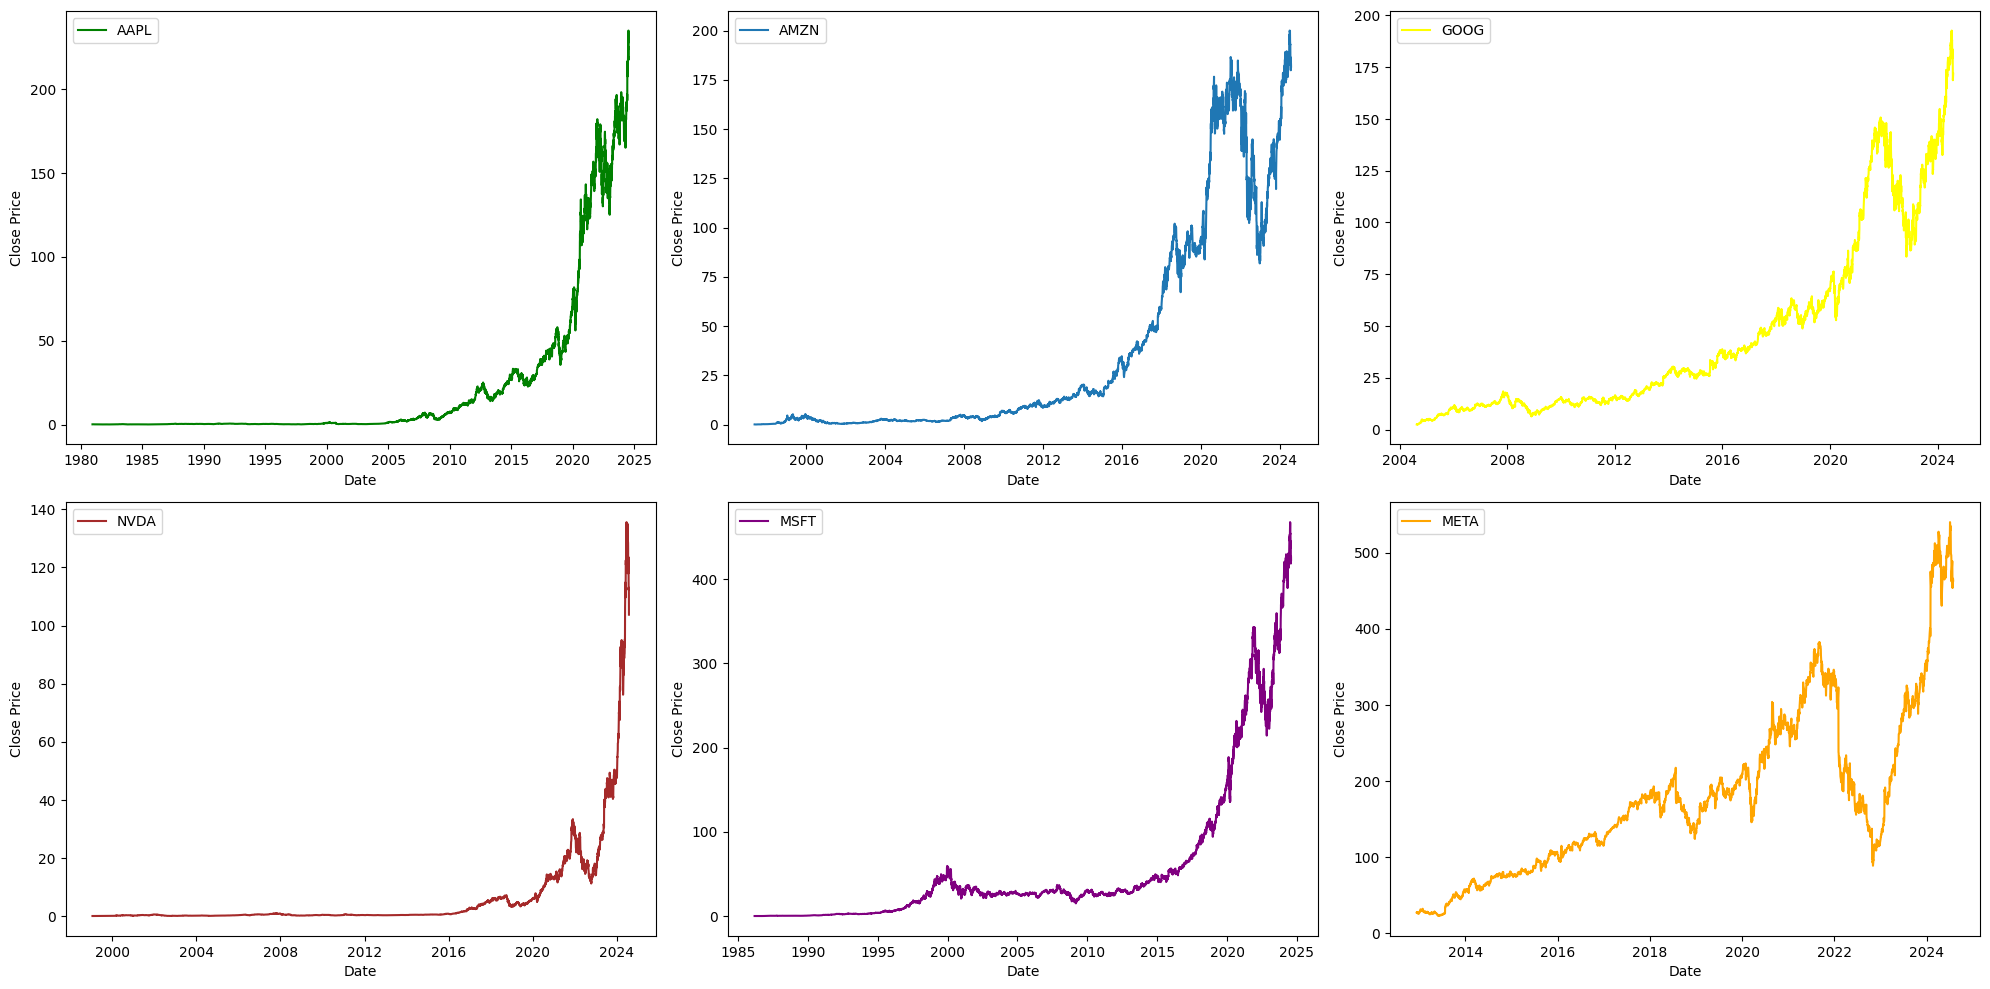

In [47]:
plot_closing_prices(df_aapl, df_amzn, df_goog, df_meta, df_msft, df_nvda)

In [48]:
add_technical_indicators(df_aapl)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,222.376929,48.687742,4.662717,6.678882
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,221.911508,47.386437,3.748082,6.092722
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,221.535174,48.055700,3.026267,5.479431
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,221.221349,48.476184,2.448591,4.873263


In [49]:
add_technical_indicators(df_meta)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,493.134155,36.964279,-6.550694,-1.274374
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,489.350903,34.814669,-8.810746,-2.781648
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,487.098437,40.628601,-9.500635,-4.125446
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,485.061442,40.633231,-9.932081,-5.286773


In [50]:
add_technical_indicators(df_goog)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,183.080916,37.434718,-0.034166,1.571016
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,181.755115,32.279082,-1.106693,1.035474
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,180.509865,31.843937,-1.972672,0.433845
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,179.616545,36.545844,-2.433223,-0.139569


In [51]:
add_technical_indicators(df_msft)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,446.197526,36.980921,-0.684986,3.013510
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,443.550142,31.696381,-2.740453,1.862718
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,441.809175,37.944660,-3.771598,0.735855
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,440.373064,39.217239,-4.420024,-0.295321


In [26]:
add_technical_indicators(df_nvda)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD,MACD_Signal
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,124.9165,123.060740,41.589800,-0.007652,1.879233
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,124.2105,122.034003,39.943932,-0.817813,1.339824
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,123.6640,121.179336,40.940507,-1.381013,0.795656
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,123.0665,120.266065,39.606589,-1.923793,0.251767


In [52]:
# scripts/quantitative_analysis.py
import pandas as pd
def add_technical_indicators(df):
    # Add Simple Moving Average (SMA), e.g., 20-day SMA
    df['SMA'] = df['Close'].rolling(window=20).mean()
    return df

In [53]:
df_aapl = add_technical_indicators(df_aapl)
df_amzn = add_technical_indicators(df_amzn)
df_goog = add_technical_indicators(df_goog)
df_meta = add_technical_indicators(df_meta)
df_msft = add_technical_indicators(df_msft)
df_nvda = add_technical_indicators(df_nvda)

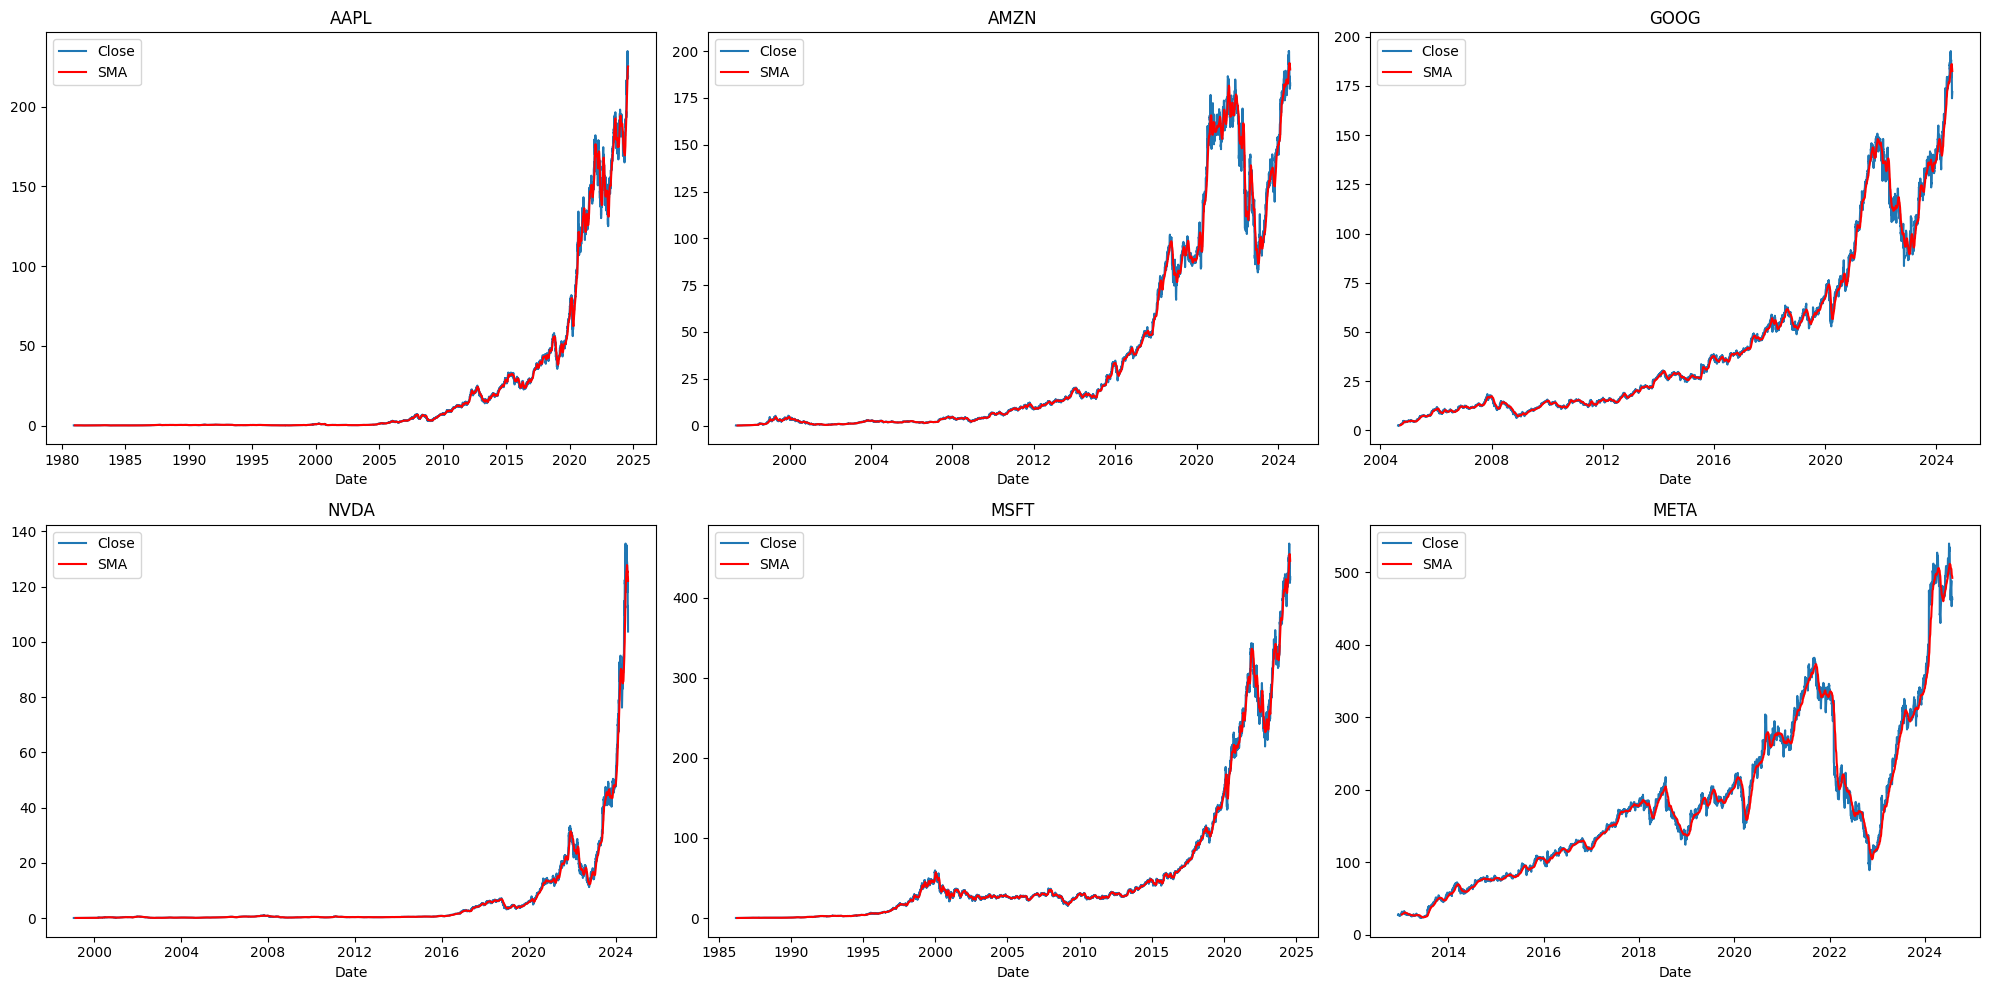

In [54]:
plot_technical_vs_close(df_aapl, df_amzn, df_goog, df_meta, df_msft, df_nvda,'SMA')

In [58]:
# scripts/quantitative_analysis.py
import pandas as pd
def add_technical_indicators(df):
    # Add Simple Moving Average (SMA), e.g., 20-day SMA
    df['SMA'] = df['Close'].rolling(window=20).mean()
    # Add Exponential Moving Average (EMA), e.g., 20-day EMA
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
    return df

In [60]:
df_aapl = add_technical_indicators(df_aapl)
df_amzn = add_technical_indicators(df_amzn)
df_goog = add_technical_indicators(df_goog)
df_meta = add_technical_indicators(df_meta)
df_msft = add_technical_indicators(df_msft)
df_nvda = add_technical_indicators(df_nvda)

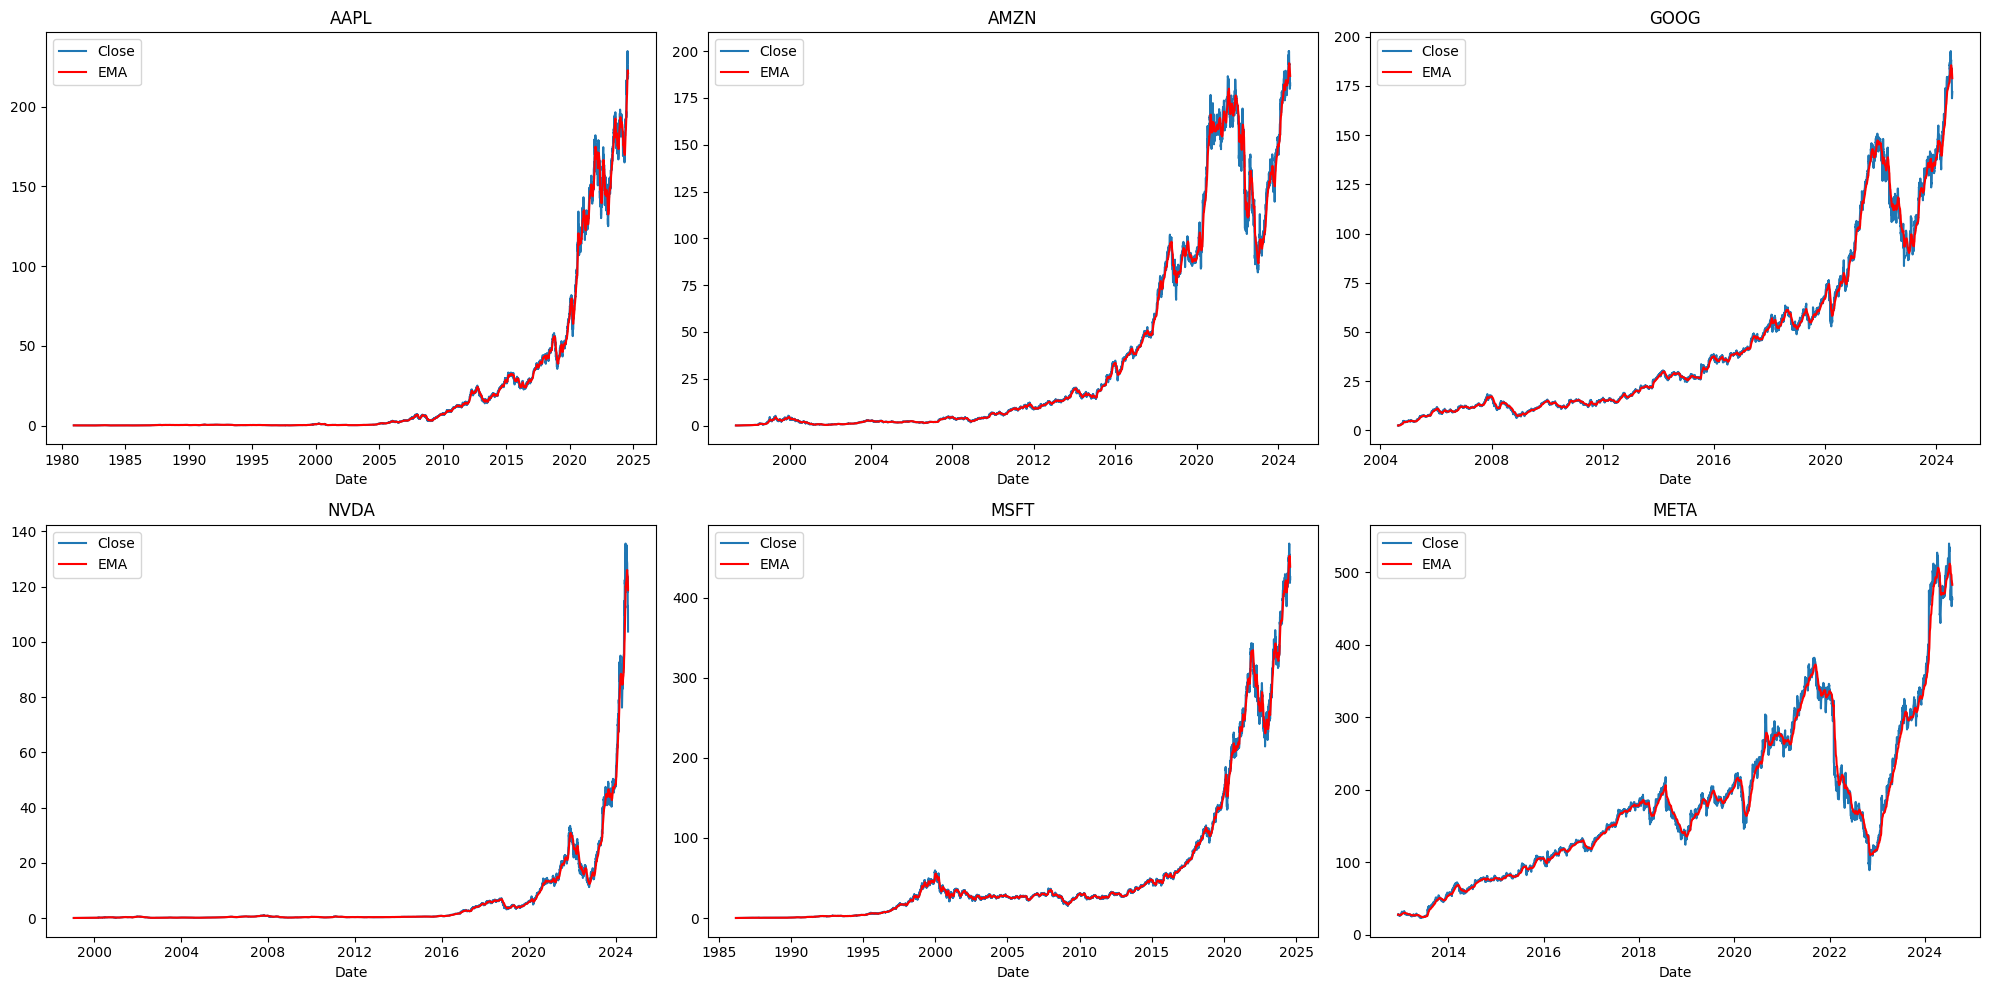

In [61]:
plot_technical_vs_close(df_aapl, df_amzn, df_goog, df_meta, df_msft, df_nvda,'EMA')

In [62]:
# scripts/quantitative_analysis.py
import pandas as pd
def add_technical_indicators(df):
    # Add Simple Moving Average (SMA), e.g., 20-day SMA
    df['SMA'] = df['Close'].rolling(window=20).mean()
    # Add Exponential Moving Average (EMA), e.g., 20-day EMA
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
    # Add Exponential Moving Average (RSI), e.g., 20-day EMA
    df['RSI'] = df['Close'].ewm(span=20, adjust=False).mean()
    return df

In [63]:
df_aapl = add_technical_indicators(df_aapl)
df_amzn = add_technical_indicators(df_amzn)
df_goog = add_technical_indicators(df_goog)
df_meta = add_technical_indicators(df_meta)
df_msft = add_technical_indicators(df_msft)
df_nvda = add_technical_indicators(df_nvda)

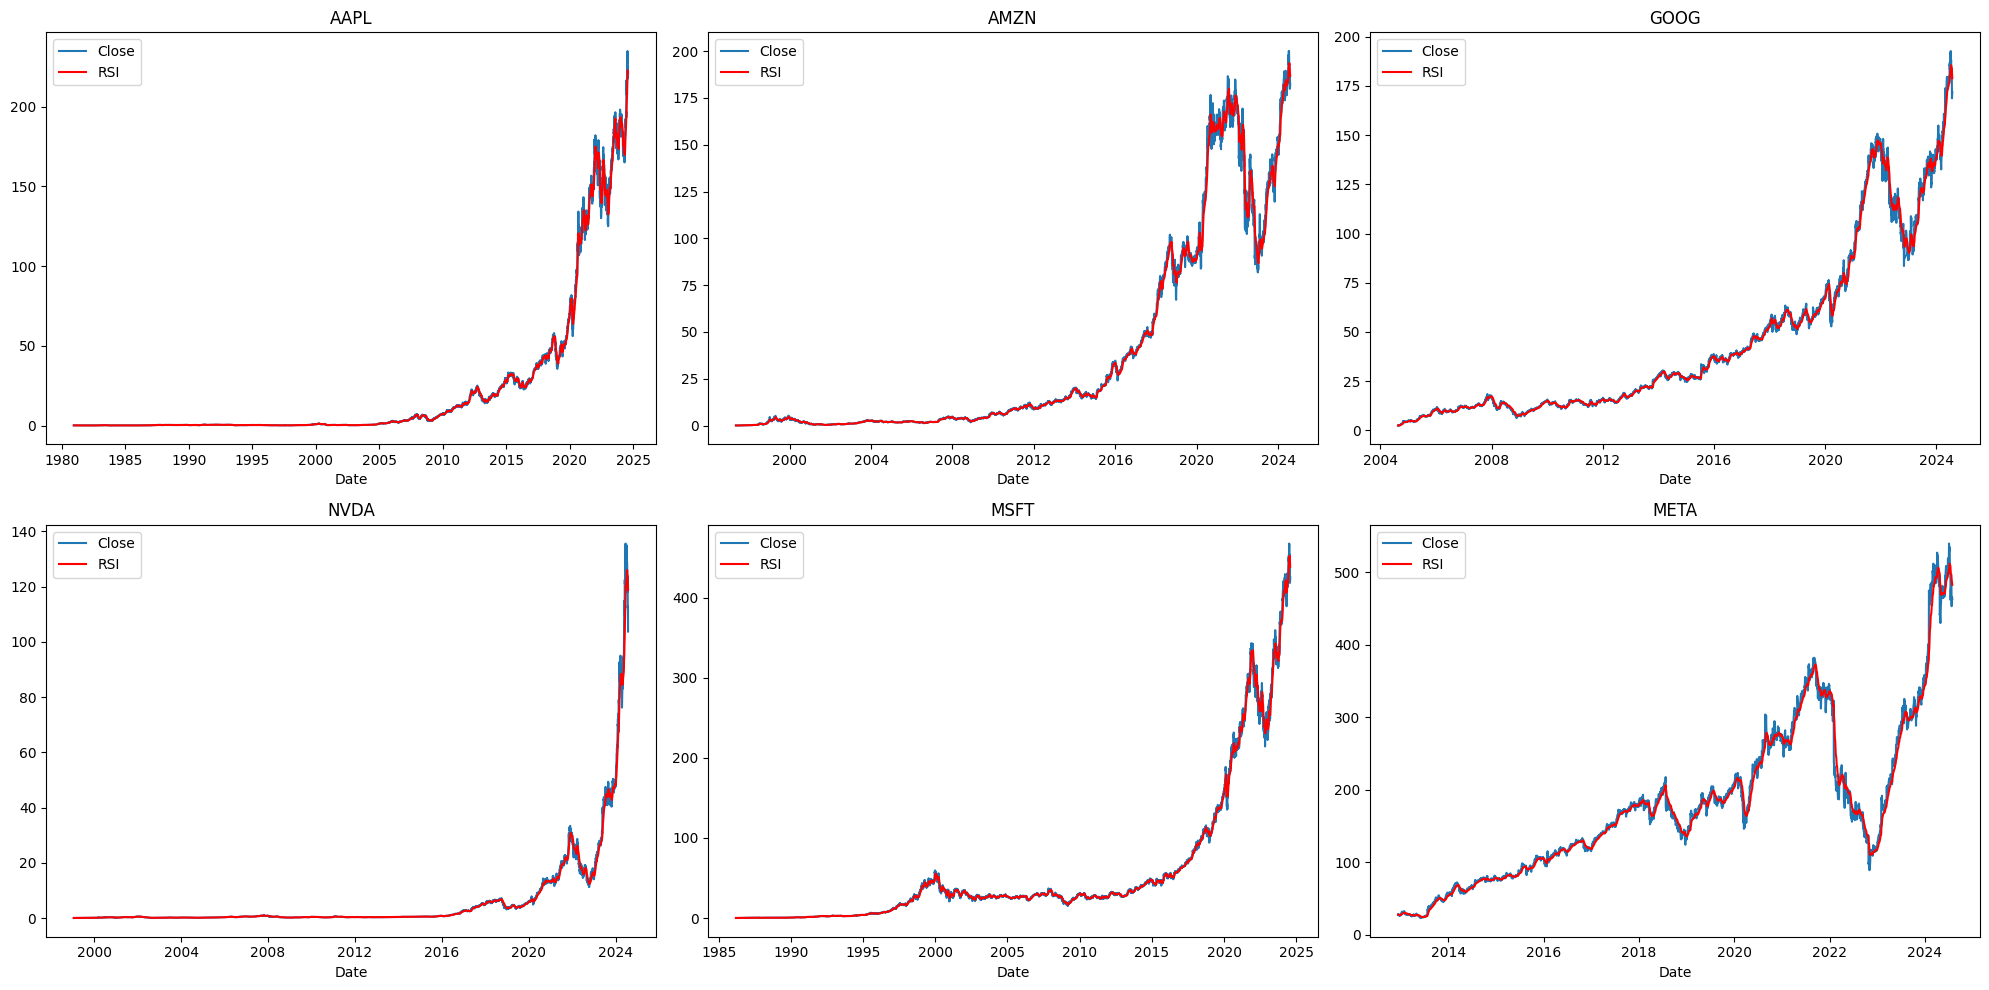

In [64]:
plot_technical_vs_close(df_aapl, df_amzn, df_goog, df_meta, df_msft, df_nvda,'RSI')

In [65]:
# scripts/quantitative_analysis.py
import pandas as pd
def add_technical_indicators(df):
    # Add Simple Moving Average (SMA), e.g., 20-day SMA
    df['SMA'] = df['Close'].rolling(window=20).mean()
    # Add Exponential Moving Average (EMA), e.g., 20-day EMA
    df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
    # Add Exponential Moving Average (RSI), e.g., 20-day EMA
    df['RSI'] = df['Close'].ewm(span=20, adjust=False).mean()
    # Add Exponential Moving Average (MACD), e.g., 20-day EMA
    df['MACD'] = df['Close'].ewm(span=20, adjust=False).mean()
    return df

In [66]:
df_aapl = add_technical_indicators(df_aapl)
df_amzn = add_technical_indicators(df_amzn)
df_goog = add_technical_indicators(df_goog)
df_meta = add_technical_indicators(df_meta)
df_msft = add_technical_indicators(df_msft)
df_nvda = add_technical_indicators(df_nvda)

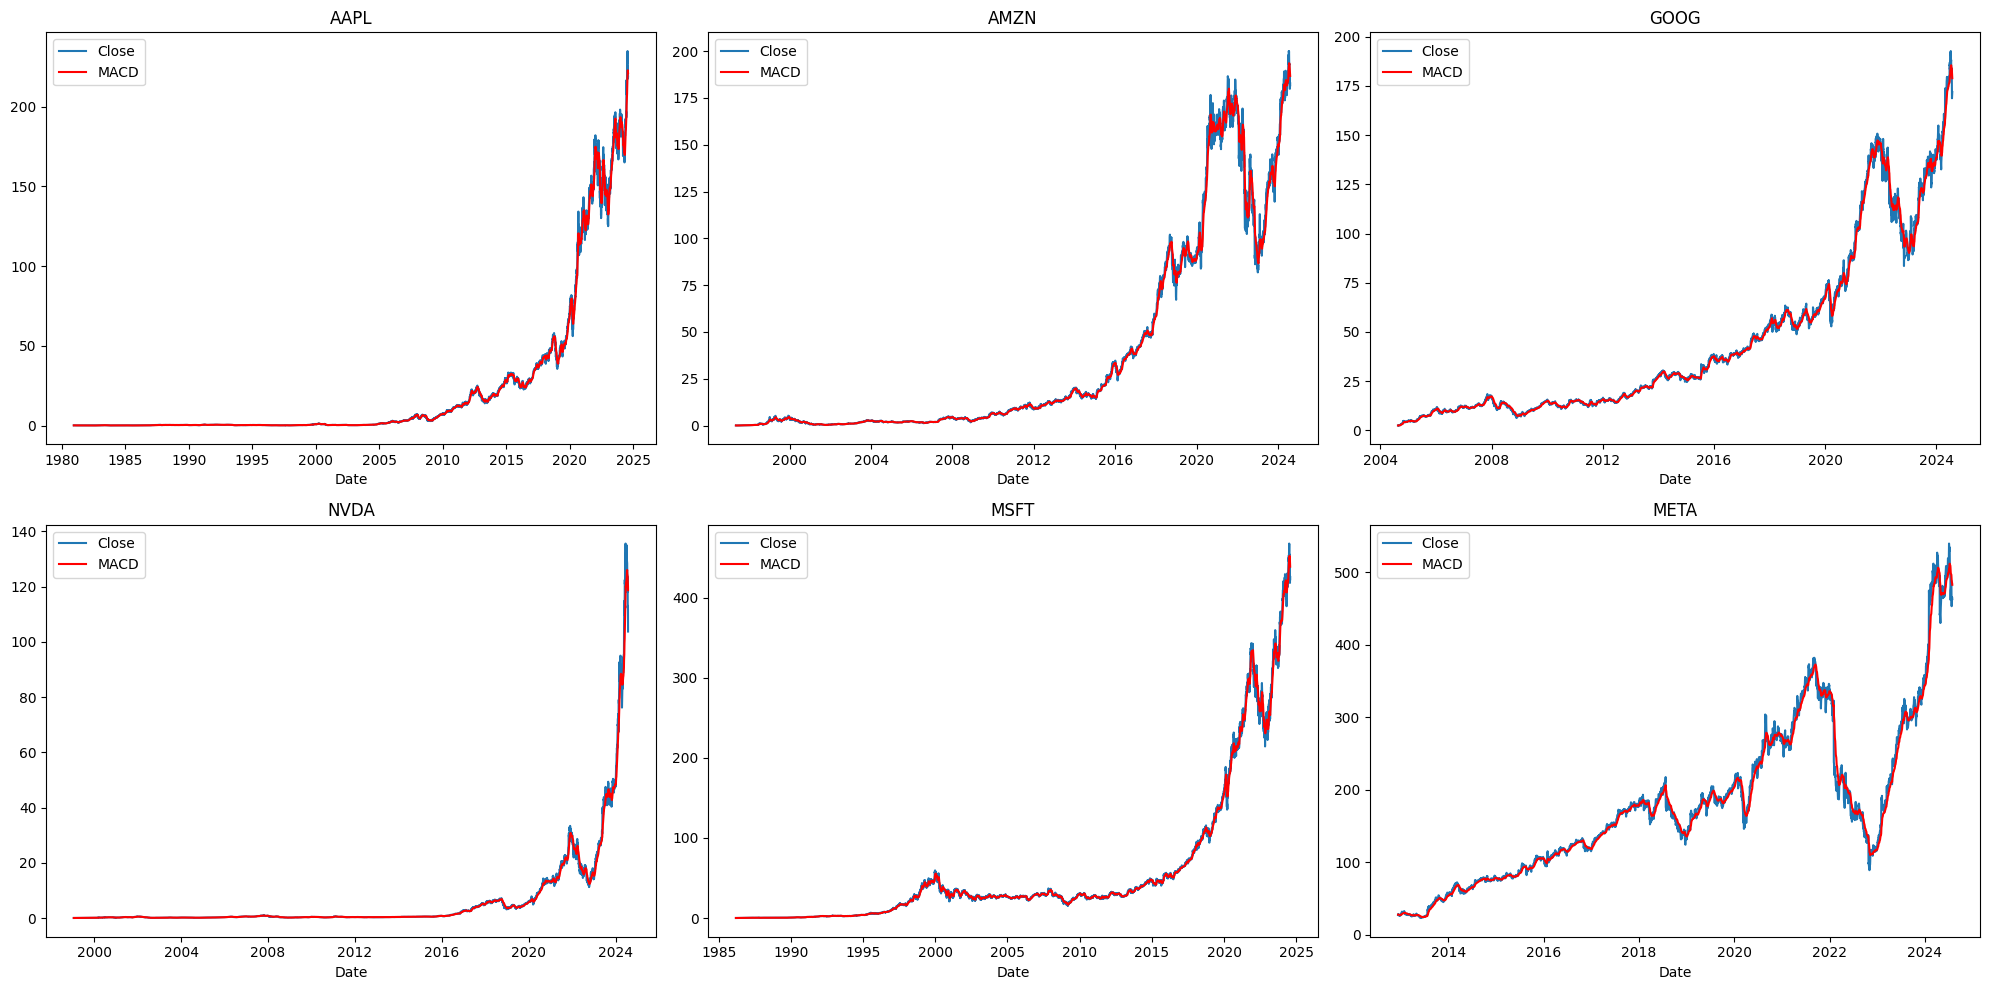

In [67]:
plot_technical_vs_close(df_aapl, df_amzn, df_goog, df_meta, df_msft, df_nvda,'MACD')

In [73]:
import os
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
for stock in stocks:
    file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\{}_historical_data.csv'.format(stock)
    print(f"Checking {stock}: {file_path} - Exists: {os.path.exists(file_path)}")

Checking AAPL: c:\Users\Daniel.Temesgen\Desktop\data\AAPL_historical_data.csv - Exists: True
Checking AMZN: c:\Users\Daniel.Temesgen\Desktop\data\AMZN_historical_data.csv - Exists: True
Checking GOOG: c:\Users\Daniel.Temesgen\Desktop\data\GOOG_historical_data.csv - Exists: True
Checking META: c:\Users\Daniel.Temesgen\Desktop\data\META_historical_data.csv - Exists: True
Checking MSFT: c:\Users\Daniel.Temesgen\Desktop\data\MSFT_historical_data.csv - Exists: True
Checking NVDA: c:\Users\Daniel.Temesgen\Desktop\data\NVDA_historical_data.csv - Exists: True


In [74]:
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
stock_dfs = {}
for stock in stocks:
    file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\{}_historical_data.csv'.format(stock)
    try:
        df = load_data(file_path)
        stock_dfs[stock] = df
        print(f"Loaded {stock} data with {len(df)} rows")
        print(df.head())
    except FileNotFoundError:
        print(f"Error: {stock}_historical_data.csv not found at {file_path}")

2025-05-31 14:52:50,070 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\AAPL_historical_data.csv with 10998 rows
2025-05-31 14:52:50,859 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\AMZN_historical_data.csv with 6846 rows
2025-05-31 14:52:50,875 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\GOOG_historical_data.csv with 5020 rows
2025-05-31 14:52:50,890 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\META_historical_data.csv with 2926 rows
2025-05-31 14:52:50,913 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\MSFT_historical_data.csv with 9672 rows
2025-05-31 14:52:50,932 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\NVDA_historical_data.csv with 6421 rows


Loaded AAPL data with 10998 rows
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Loaded AMZN data with 6846 rows
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0

In [75]:

# Assign DataFrames to individual variables for compatibility with existing code
df_aapl = stock_dfs.get('AAPL')
df_amzn = stock_dfs.get('AMZN')
df_goog = stock_dfs.get('GOOG')
df_meta = stock_dfs.get('META')
df_msft = stock_dfs.get('MSFT')
df_nvda = stock_dfs.get('NVDA')

In [76]:
# Manual computation of technical indicators
def compute_manual_indicators(df):
    # Ensure 'Close' column exists and is numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    # Simple Moving Average (SMA) - 20 days
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # Exponential Moving Average (EMA) - 12 and 26 days for MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

    # MACD (MACD Line = 12-day EMA - 26-day EMA)
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['Signal']

    # RSI (Relative Strength Index) - 14 days
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    return df

# Apply technical indicators to all stock DataFrames
for stock, df in stock_dfs.items():
    df = compute_manual_indicators(df)
    stock_dfs[stock] = df
    print(f"Technical indicators added for {stock}")
    display(df[['Close', 'SMA_20', 'MACD', 'Signal', 'MACD_Hist', 'RSI']].tail())

Technical indicators added for AAPL


,Close,SMA_20,MACD,Signal,MACD_Hist,RSI
10993,218.539993,224.228500,4.662717,6.678882,-2.016164,46.477871
10994,217.490005,224.440500,3.748082,6.092722,-2.344640,38.650941
10995,217.960007,224.633500,3.026267,5.479431,-2.453164,37.019471
10996,218.240005,225.014500,2.448591,4.873263,-2.424672,36.042790
10997,218.800003,225.117001,2.012764,4.301163,-2.288399,28.936417


Technical indicators added for AMZN


,Close,SMA_20,MACD,Signal,MACD_Hist,RSI
6841,180.830002,192.8900,-1.342010,0.635114,-1.977124,22.880276
6842,179.850006,192.2020,-1.878483,0.132395,-2.010878,15.812703
6843,182.500000,191.4345,-2.065994,-0.307283,-1.758711,23.272844
6844,183.199997,190.9320,-2.133520,-0.672530,-1.460990,24.828434
6845,181.710007,190.1575,-2.280971,-0.994218,-1.286753,22.688822


Technical indicators added for GOOG


,Close,SMA_20,MACD,Signal,MACD_Hist,RSI
5015,174.369995,185.500001,-0.034166,1.571016,-1.605182,32.949200
5016,169.160004,184.689501,-1.106693,1.035474,-2.142167,20.633707
5017,168.679993,183.780501,-1.972672,0.433845,-2.406517,21.179283
5018,171.130005,183.166001,-2.433223,-0.139569,-2.293654,26.000525
5019,171.860001,182.534501,-2.708091,-0.653273,-2.054818,23.154383


Technical indicators added for META


,Close,SMA_20,MACD,Signal,MACD_Hist,RSI
2921,461.269989,502.223499,-6.550694,-1.274374,-5.276320,35.905747
2922,453.410004,499.237999,-8.810746,-2.781648,-6.029098,21.289173
2923,465.700012,496.545000,-9.500635,-4.125446,-5.375189,29.119081
2924,465.709991,494.619499,-9.932081,-5.286773,-4.645308,28.805959
2925,463.190002,492.545000,-10.357947,-6.301008,-4.056939,26.086957


Technical indicators added for MSFT


,Close,SMA_20,MACD,Signal,MACD_Hist,RSI
9667,428.899994,451.887498,-0.684986,3.013510,-3.698496,28.801399
9668,418.399994,450.199498,-2.740453,1.862718,-4.603171,18.838754
9669,425.269989,448.820497,-3.771598,0.735855,-4.507452,25.737303
9670,426.730011,447.809497,-4.420024,-0.295321,-4.124703,29.284019
9671,422.920013,446.118997,-5.181612,-1.272579,-3.909033,21.601817


Technical indicators added for NVDA


,Close,SMA_20,MACD,Signal,MACD_Hist,RSI
6416,114.250000,124.9165,-0.007652,1.879233,-1.886885,36.836183
6417,112.279999,124.2105,-0.817813,1.339824,-2.157637,37.170991
6418,113.059998,123.6640,-1.381013,0.795656,-2.176669,35.220622
6419,111.589996,123.0665,-1.923793,0.251767,-2.175559,30.014134
6420,103.730003,122.0380,-2.954132,-0.389413,-2.564719,21.043835


In [77]:
# Compute financial metrics using PyNance
def compute_financial_metrics(df):
    try:
        # Calculate daily returns
        df['Returns'] = df['Close'].pct_change()

        # Volatility (annualized standard deviation of returns)
        df['Volatility'] = df['Returns'].rolling(window=252).std() * np.sqrt(252)

        # Use PyNance to calculate cumulative returns
        df['Cumulative_Returns'] = pyn.core.cum_returns(df['Returns'])

        # Sharpe Ratio (assuming risk-free rate = 0 for simplicity)
        df['Sharpe_Ratio'] = (df['Returns'].rolling(window=252).mean() * 252) / df['Volatility']

    except Exception as e:
        print(f"Error with PyNance: {e}. Computing metrics manually.")
        # Manual computation
        df['Returns'] = df['Close'].pct_change()
        df['Volatility'] = df['Returns'].rolling(window=252).std() * np.sqrt(252)
        df['Cumulative_Returns'] = (1 + df['Returns']).cumprod() - 1
        df['Sharpe_Ratio'] = (df['Returns'].rolling(window=252).mean() * 252) / df['Volatility']

    return df

# Apply financial metrics to all stock DataFrames
for stock, df in stock_dfs.items():
    df = compute_financial_metrics(df)
    stock_dfs[stock] = df
    print(f"Financial metrics computed for {stock}")
    display(df[['Returns', 'Volatility', 'Cumulative_Returns', 'Sharpe_Ratio']].tail())

Error with PyNance: name 'pyn' is not defined. Computing metrics manually.
Financial metrics computed for AAPL


,Returns,Volatility,Cumulative_Returns,Sharpe_Ratio
10993,-0.028754,0.226936,1701.714537,0.666021
10994,-0.004805,0.226965,1693.533748,0.624878
10995,0.002161,0.226936,1697.195677,0.614454
10996,0.001285,0.226824,1699.377237,0.649434
10997,0.002566,0.226462,1703.740356,0.602156


Error with PyNance: name 'pyn' is not defined. Computing metrics manually.
Financial metrics computed for AMZN


,Returns,Volatility,Cumulative_Returns,Sharpe_Ratio
6841,-0.029934,0.277932,1845.768238,1.358822
6842,-0.005419,0.278015,1835.759805,1.329703
6843,0.014734,0.278182,1862.823481,1.409158
6844,0.003836,0.278190,1869.972362,1.420099
6845,-0.008133,0.276795,1854.755492,1.286318


Error with PyNance: name 'pyn' is not defined. Computing metrics manually.
Financial metrics computed for GOOG


,Returns,Volatility,Cumulative_Returns,Sharpe_Ratio
5015,-0.050272,0.277286,68.772192,1.431110
5016,-0.029879,0.278999,66.687473,1.288469
5017,-0.002838,0.273606,66.495402,1.099005
5018,0.014525,0.273930,67.475746,1.144815
5019,0.004266,0.272978,67.767846,1.075861


Error with PyNance: name 'pyn' is not defined. Computing metrics manually.
Financial metrics computed for META


,Returns,Volatility,Cumulative_Returns,Sharpe_Ratio
2921,-0.056109,0.369304,15.724800,1.421570
2922,-0.017040,0.369716,15.439812,1.347369
2923,0.027106,0.370378,15.885425,1.380552
2924,0.000021,0.367977,15.885787,1.270021
2925,-0.005411,0.365584,15.794416,1.142695


Error with PyNance: name 'pyn' is not defined. Computing metrics manually.
Financial metrics computed for MSFT


,Returns,Volatility,Cumulative_Returns,Sharpe_Ratio
9667,-0.035855,0.201093,4410.552862,1.181851
9668,-0.024481,0.202043,4302.552615,0.970940
9669,0.016420,0.198931,4373.215583,1.257865
9670,0.003433,0.197730,4388.232986,1.388427
9671,-0.008928,0.196739,4349.044351,1.232468


Error with PyNance: name 'pyn' is not defined. Computing metrics manually.
Financial metrics computed for NVDA


,Returns,Volatility,Cumulative_Returns,Sharpe_Ratio
6416,-0.068032,0.466078,2784.498257,2.250591
6417,-0.017243,0.466143,2736.468192,2.161973
6418,0.006947,0.466066,2755.485130,2.187902
6419,-0.013002,0.466340,2719.645429,2.137598
6420,-0.070436,0.472001,2528.013073,1.923498


2025-05-31 14:56:09,475 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:56:09,686 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:56:09,916 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:56:10,121 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:56:10,302 - INFO - Using categorical units to plot a list of strings that are all parsable as 

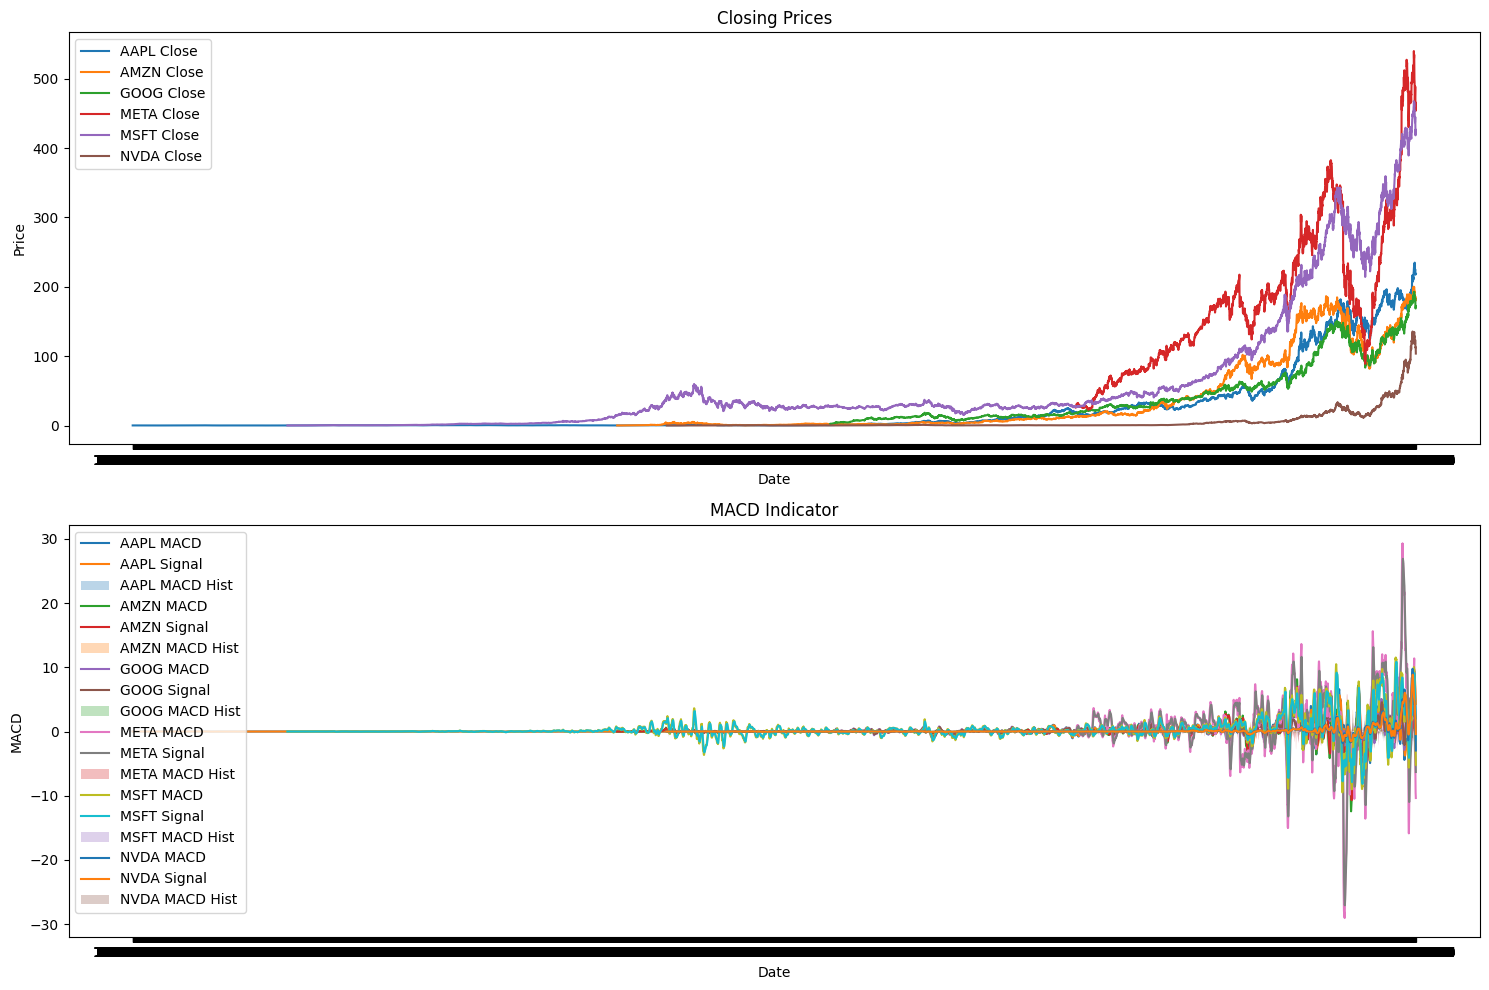

2025-05-31 14:58:14,343 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:58:14,522 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:58:14,706 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:58:14,885 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 14:58:14,996 - INFO - Using categorical units to plot a list of strings that are all parsable as 

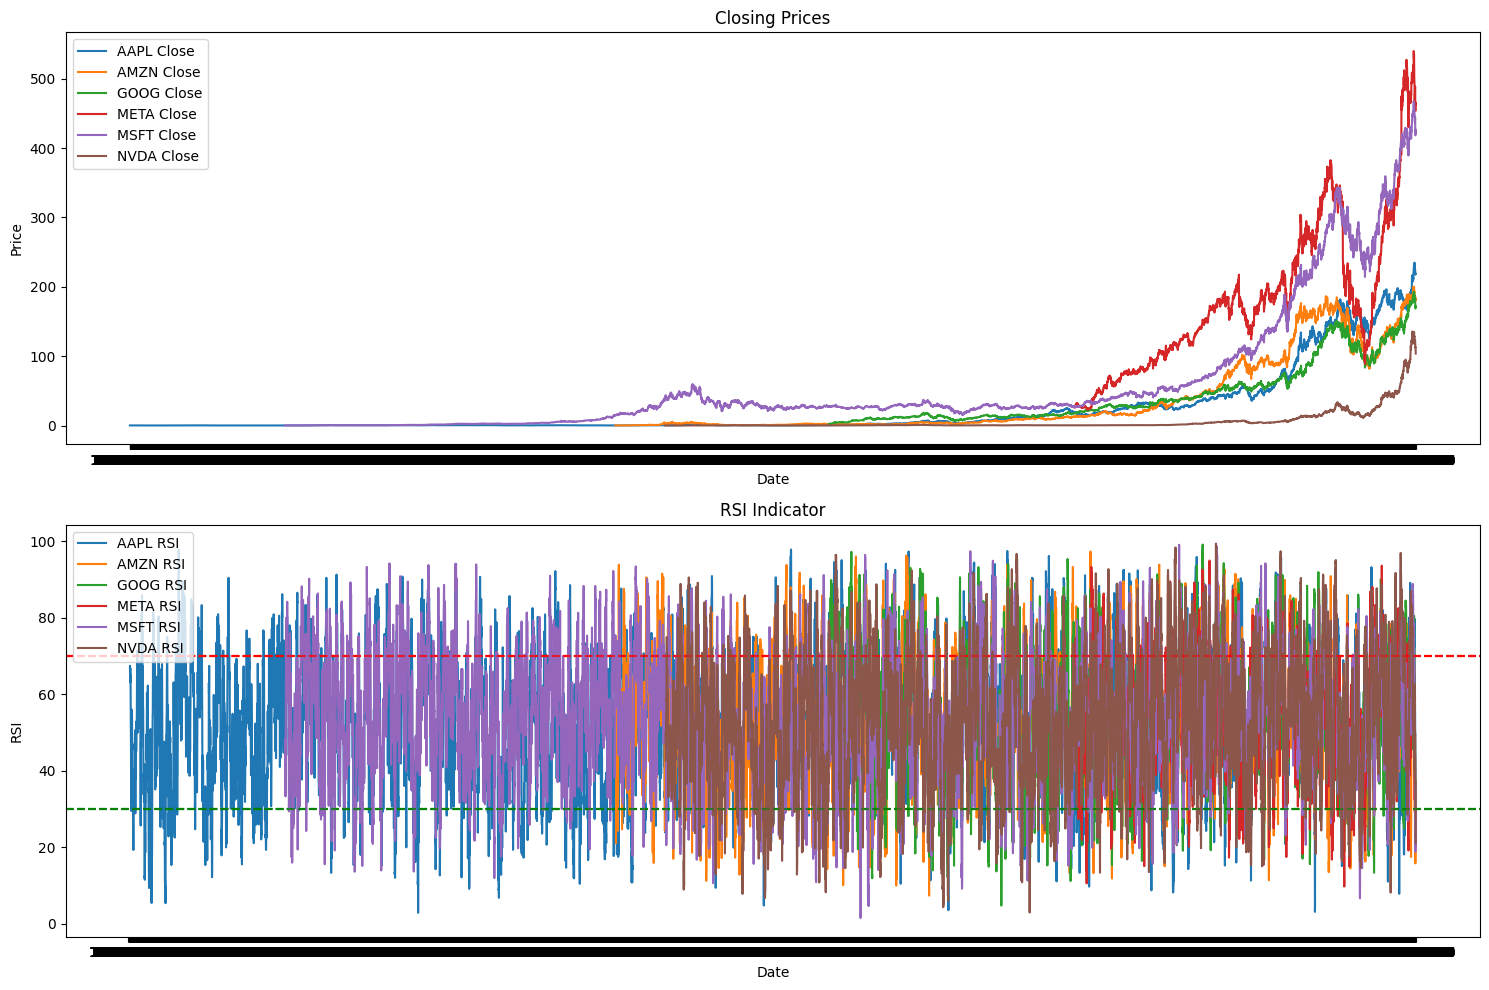

In [78]:
# Custom plotting function to visualize technical indicators vs. close prices
def custom_plot_technical_vs_close(dfs, indicator='MACD'):
    plt.figure(figsize=(15, 10))
    
    for stock, df in dfs.items():
        if df is None:
            continue
        plt.subplot(2, 1, 1)
        plt.plot(df['Date'], df['Close'], label=f'{stock} Close')
        plt.title('Closing Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid()

        plt.subplot(2, 1, 2)
        if indicator == 'MACD':
            plt.plot(df['Date'], df['MACD'], label=f'{stock} MACD')
            plt.plot(df['Date'], df['Signal'], label=f'{stock} Signal')
            plt.fill_between(df['Date'], df['MACD_Hist'], 0, alpha=0.3, label=f'{stock} MACD Hist')
        elif indicator == 'RSI':
            plt.plot(df['Date'], df['RSI'], label=f'{stock} RSI')
            plt.axhline(70, linestyle='--', color='red', alpha=0.5)
            plt.axhline(30, linestyle='--', color='green', alpha=0.5)
        plt.title(f'{indicator} Indicator')
        plt.xlabel('Date')
        plt.ylabel(indicator)
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

# Plot MACD vs Close for all stocks
custom_plot_technical_vs_close(stock_dfs, 'MACD')

# Plot RSI vs Close for all stocks
custom_plot_technical_vs_close(stock_dfs, 'RSI')

2025-05-31 15:15:06,128 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 15:15:09,820 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 15:15:11,298 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 15:15:13,981 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-05-31 15:15:15,285 - INFO - Using categorical units to plot a list of strings that are all parsable as 

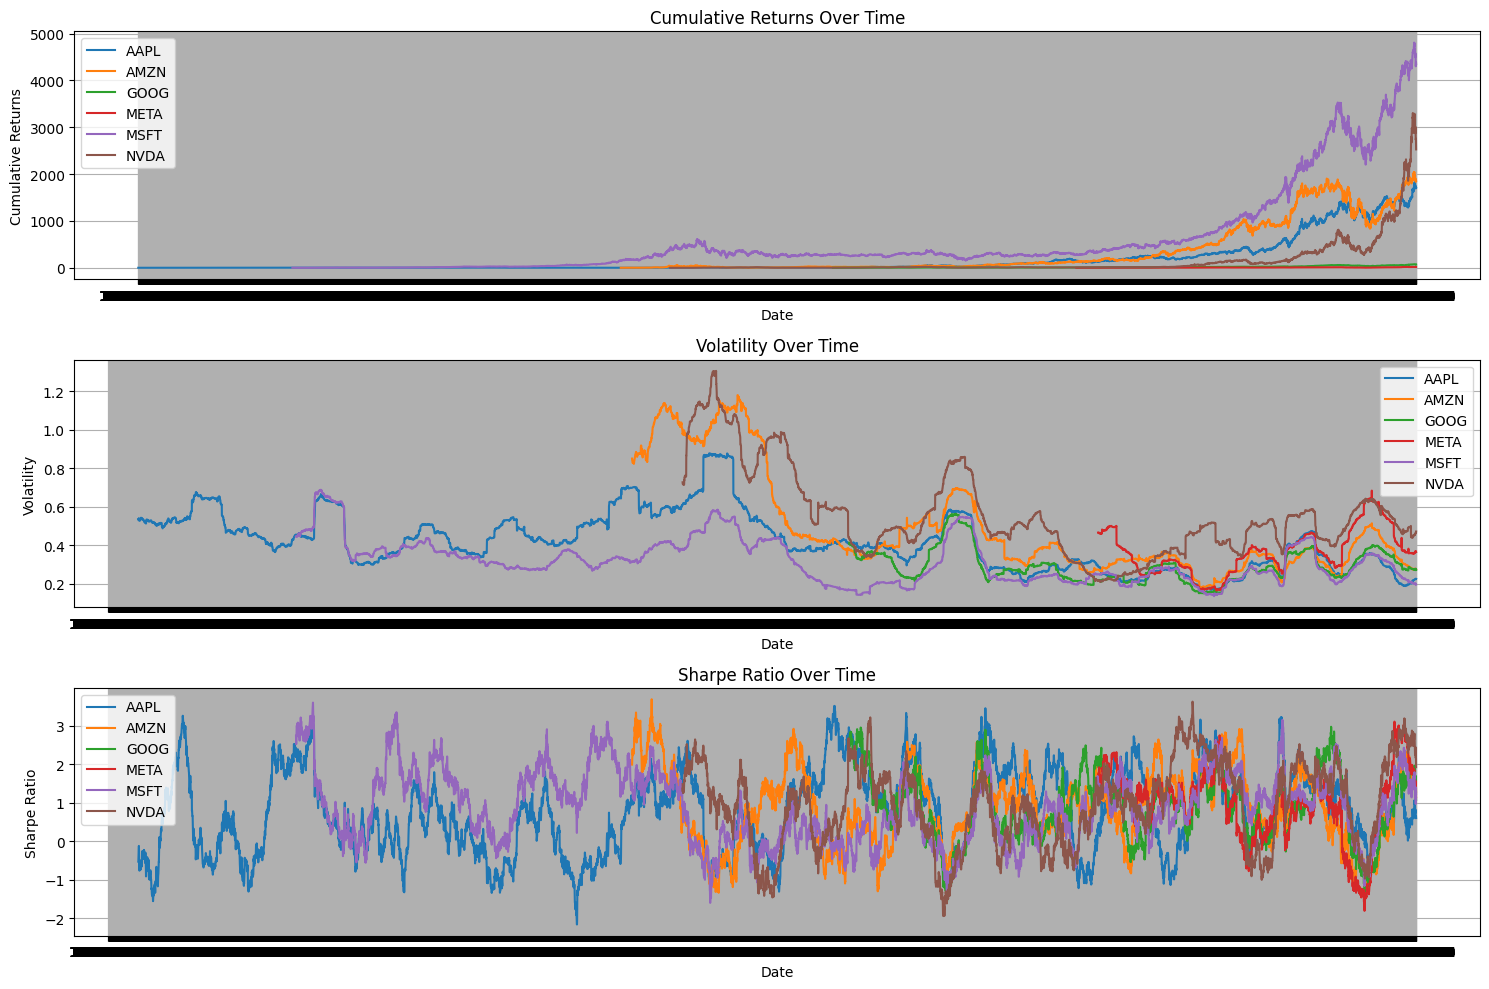

In [79]:
# Visualize financial metrics
def plot_financial_metrics(dfs):
    plt.figure(figsize=(15, 10))
    
    # Plot Cumulative Returns
    plt.subplot(3, 1, 1)
    for stock, df in dfs.items():
        if df is None:
            continue
        plt.plot(df['Date'], df['Cumulative_Returns'], label=f'{stock}')
    plt.title('Cumulative Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()

    # Plot Volatility
    plt.subplot(3, 1, 2)
    for stock, df in dfs.items():
        if df is None:
            continue
        plt.plot(df['Date'], df['Volatility'], label=f'{stock}')
    plt.title('Volatility Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid()

    # Plot Sharpe Ratio
    plt.subplot(3, 1, 3)
    for stock, df in dfs.items():
        if df is None:
            continue
        plt.plot(df['Date'], df['Sharpe_Ratio'], label=f'{stock}')
    plt.title('Sharpe Ratio Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot financial metrics for all stocks
plot_financial_metrics(stock_dfs)